In [93]:
import numpy as np
import pandas as pd
import seaborn as sns

In [95]:
df = pd.read_excel("C:\\Users\\Buse Sena Vardar C\\Desktop\\veri madenciliği ödev 1\\NAFLD.xlsx")

In [97]:
df.shape

(605, 62)

In [101]:
df.columns.to_list()

['Patient No.',
 'Age',
 'Gender (Female=1, Male=2)',
 'Height',
 'Weight',
 'Body Mass Index',
 'Waist Circumference',
 'Hip Circumference',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Diyabetes Mellitus (No=0, Yes=1)',
 'Hypertension (No=0, Yes=1)',
 'Hyperlipidemia (No=0, Yes=1)',
 'Metabolic syndrome (No=0, Yes=1)',
 'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)',
 'AST',
 'ALT',
 'ALP',
 'GGT',
 'LDH',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Total Protein',
 'Albumin',
 'Total Cholesterol',
 'Triglycerides',
 'HDL',
 'LDL',
 'Microalbumin Spot Urine',
 'Microalbumin/Creatinine Ratio',
 'TSH',
 'CK',
 'Leukocyte',
 'Hemoglobin',
 'Trombosit',
 'Mean Corpuscular Volume',
 'Mean Platelet Volume',
 'PT',
 'INR',
 'Vitamin D',
 'Ferritin',
 'Ceruloplasmin',
 'C Peptide',
 'Glucose',
 'Insulin',
 'HOMA',
 'Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)',
 'Uric Acid',
 'BUN',
 'Creatinine',
 'Hemoglobin - A1C',
 '

In [103]:
# Veri setinin temel bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 62 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Patient No.                                                                                  605 non-null    int64  
 1   Age                                                                                          605 non-null    int64  
 2   Gender (Female=1, Male=2)                                                                    605 non-null    int64  
 3   Height                                                                                       605 non-null    int64  
 4   Weight                                                                                       605 non-null    int64  
 5   Body Mass Index                     

In [105]:
# İlk birkaç satırı görme
print("Veri Seti İlk Satırlar:")
df.head()

Veri Seti İlk Satırlar:


,Patient No.,Age,"Gender (Female=1, Male=2)",Height,Weight,Body Mass Index,Waist Circumference,Hip Circumference,Systolic Blood Pressure,Diastolic Blood Pressure,...,Activity,Fibrosis,NAS score according to Kleiner,"NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)","Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)","Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)","Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)","Diagnosis according to SAF (NASH=1, NAFL=2)","Type of Disease (Mild illness=1, Severe illness=2)"
0,1,60,1,150,80,35.56,119.0,104.0,135,77,...,2,1,4,1,1,0,0,0,1,2
1,2,55,1,154,73,30.78,101.0,98.0,120,72,...,2,0,4,1,0,0,0,0,1,2
2,3,53,2,170,101,34.95,116.0,112.0,120,80,...,2,3,4,1,1,1,1,0,1,2
3,4,33,2,175,95,31.02,114.0,114.0,124,83,...,2,1,4,1,1,0,0,0,1,2
4,5,23,2,162,68,25.91,101.0,97.0,124,79,...,2,0,4,1,0,0,0,0,1,2


In [107]:
# Eksik değerlerin sayısını ve oranlarını hesaplama
null_counts = df.isnull().sum()
null_ratios = df.isnull().mean() * 100  # Yüzde olarak boşluk oranı

# Sonuçları bir DataFrame'e kaydetme
null_summary = pd.DataFrame({
    'Missing Count': null_counts,
    'Missing Ratio (%)': null_ratios
}).sort_values(by='Missing Count', ascending=False)

# DataFrame'i gösterme
null_summary

,Missing Count,Missing Ratio (%)
Microalbumin/Creatinine Ratio,490,80.991736
CK,452,74.710744
C Peptide,438,72.396694
Microalbumin Spot Urine,422,69.752066
Vitamin D,412,68.099174
...,...,...
Body Mass Index,0,0.000000
Weight,0,0.000000
Height,0,0.000000
"Gender (Female=1, Male=2)",0,0.000000


In [109]:
threshold = 0.49  # %49 eksik değer oranı eşiği
missing_ratios = df.isnull().mean()

# Eşik değerin üzerindeki değişkenleri çıkart
columns_to_drop = missing_ratios[missing_ratios > threshold].index
df = df.drop(columns=columns_to_drop)
print(f"Çıkarılan sütunlar: {columns_to_drop}")


Çıkarılan sütunlar: Index(['Microalbumin Spot Urine', 'Microalbumin/Creatinine Ratio', 'TSH', 'CK',
       'PT', 'INR', 'Vitamin D', 'Ceruloplasmin', 'C Peptide', 'Insulin',
       'HOMA',
       'Insulin resistance according to HOMA (insulin resistance = 1, no insulin resistance = 2)',
       'Uric Acid', 'BUN', 'Creatinine'],
      dtype='object')


In [111]:
df.shape

(605, 47)

In [113]:
# Eksik değerlerin sayısını ve oranlarını hesaplama
null_counts = df.isnull().sum()
null_ratios = df.isnull().mean() * 100  # Yüzde olarak boşluk oranı
dtypes = df.dtypes
# Sonuçları bir DataFrame'e kaydetme
null_summary = pd.DataFrame({
    'Missing Count': null_counts,
    'Missing Ratio (%)': null_ratios,
    'DataType' : dtypes
}).sort_values(by='Missing Count', ascending=False)

# DataFrame'i gösterme
null_summary[null_summary["Missing Count"] > 0]

,Missing Count,Missing Ratio (%),DataType
Total Protein,82,13.553719,float64
LDH,44,7.272727,float64
Hemoglobin - A1C,41,6.776860,float64
Waist Circumference,29,4.793388,float64
"Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)",28,4.628099,float64
Ferritin,17,2.809917,float64
Mean Platelet Volume,14,2.314050,float64
Hip Circumference,7,1.157025,float64
Glucose,4,0.661157,float64
LDL,3,0.495868,float64


In [115]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    # kategorik değişkken için olan bölüm
    cat_cols = [col for col in (df.columns) if str(df[col].dtypes) in ["category","object","bool"] ]
    num_but_cat = [col for col in df.columns if str(df[col].dtypes) in ["int64","float64"] and df[col].nunique() < 10]
    cat_but_car =[col for col in df.columns if str(df[col].dtypes) in  ["category","object","bool"] and df[col].nunique() > 10 ]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # nümerik değşkenler için
    num_cols = [col for col in df.columns if str(df[col].dtype) in ["int64","float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    
    print(f"Observation: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    
    
    return cat_cols,num_cols,cat_but_car,num_but_cat

In [117]:
cat_cols,num_cols,cat_but_car,num_but_cat = grab_col_names(df)

Observation: 605
Variables: 47
cat_cols: 17
num_cols: 30
cat_but_car: 0
num_but_cat: 17


In [119]:
num_cols

['Patient No.',
 'Age',
 'Height',
 'Weight',
 'Body Mass Index',
 'Waist Circumference',
 'Hip Circumference',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'AST',
 'ALT',
 'ALP',
 'GGT',
 'LDH',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Total Protein',
 'Albumin',
 'Total Cholesterol',
 'Triglycerides',
 'HDL',
 'LDL',
 'Leukocyte',
 'Hemoglobin',
 'Trombosit',
 'Mean Corpuscular Volume',
 'Mean Platelet Volume',
 'Ferritin',
 'Glucose',
 'Hemoglobin - A1C']

In [121]:
cat_cols

['Gender (Female=1, Male=2)',
 'Diyabetes Mellitus (No=0, Yes=1)',
 'Hypertension (No=0, Yes=1)',
 'Hyperlipidemia (No=0, Yes=1)',
 'Metabolic syndrome (No=0, Yes=1)',
 'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)',
 'Steatosis',
 'Activity',
 'Fibrosis',
 'NAS score according to Kleiner',
 'NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)',
 'Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)',
 'Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)',
 'Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)',
 'Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)',
 'Diagnosis according to SAF (NASH=1, NAFL=2)',
 'Type of Disease (Mild illness=1, Severe illness=2)']

In [123]:
num_but_cat

['Gender (Female=1, Male=2)',
 'Diyabetes Mellitus (No=0, Yes=1)',
 'Hypertension (No=0, Yes=1)',
 'Hyperlipidemia (No=0, Yes=1)',
 'Metabolic syndrome (No=0, Yes=1)',
 'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)',
 'Steatosis',
 'Activity',
 'Fibrosis',
 'NAS score according to Kleiner',
 'NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)',
 'Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)',
 'Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)',
 'Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)',
 'Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)',
 'Diagnosis according to SAF (NASH=1, NAFL=2)',
 'Type of Disease (Mild illness=1, Severe illness=2)']

                           Gender (Female=1, Male=2)      Ratio
Gender (Female=1, Male=2)                                      
2                                                321  53.057851
1                                                284  46.942149
##############################


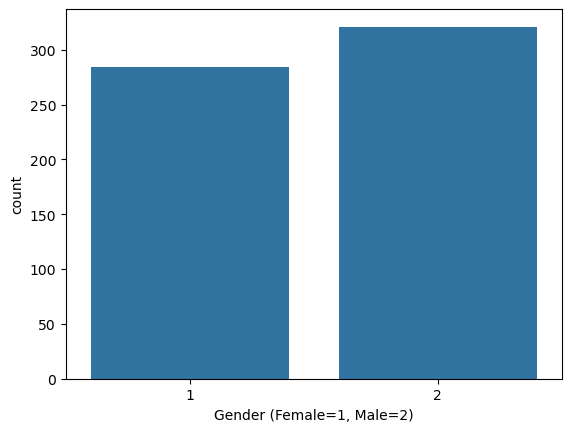

                                  Diyabetes Mellitus (No=0, Yes=1)      Ratio
Diyabetes Mellitus (No=0, Yes=1)                                             
0                                                              380  62.809917
1                                                              225  37.190083
##############################


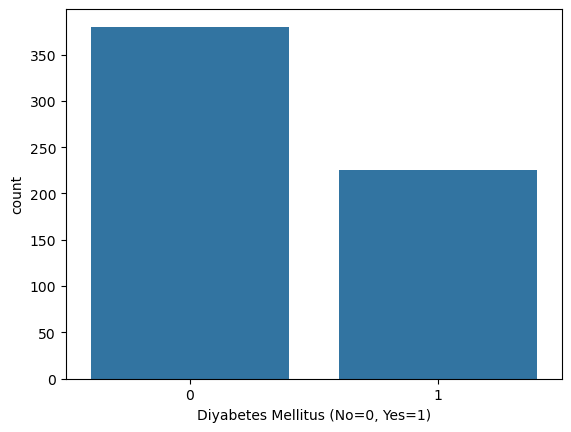

                            Hypertension (No=0, Yes=1)      Ratio
Hypertension (No=0, Yes=1)                                       
0                                                  391  64.628099
1                                                  214  35.371901
##############################


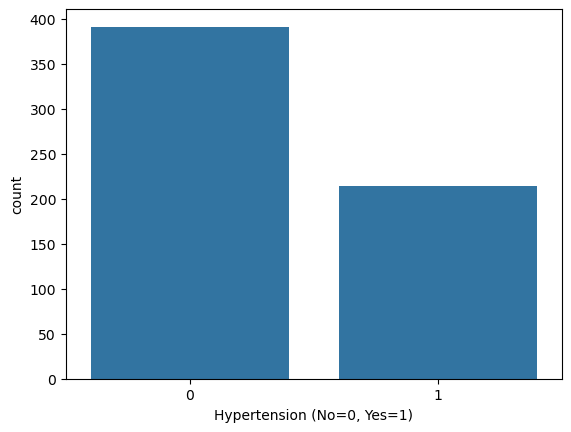

                              Hyperlipidemia (No=0, Yes=1)      Ratio
Hyperlipidemia (No=0, Yes=1)                                         
1                                                      351  58.016529
0                                                      254  41.983471
##############################


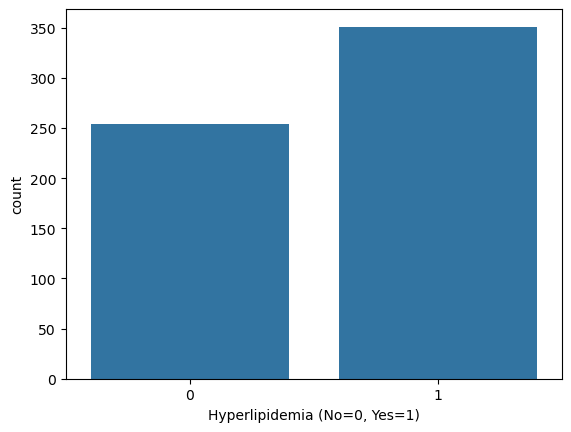

                                  Metabolic syndrome (No=0, Yes=1)      Ratio
Metabolic syndrome (No=0, Yes=1)                                             
1                                                              392  64.793388
0                                                              213  35.206612
##############################


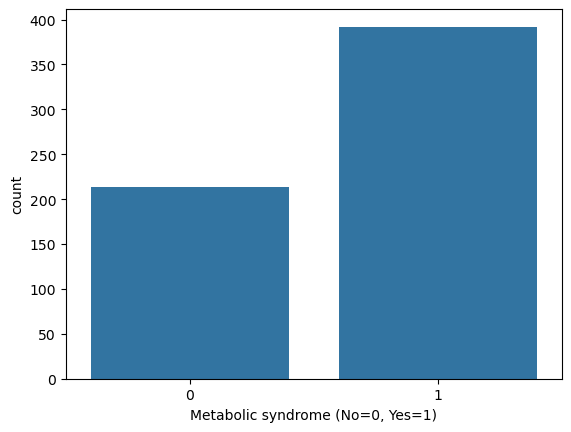

                                                    Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)  \
Smoking Status (Never Smoked=1, Left Smoking=2,...                                                               
1.0                                                                                               267            
2.0                                                                                               206            
3.0                                                                                               104            

                                                        Ratio  
Smoking Status (Never Smoked=1, Left Smoking=2,...             
1.0                                                 44.132231  
2.0                                                 34.049587  
3.0                                                 17.190083  
##############################


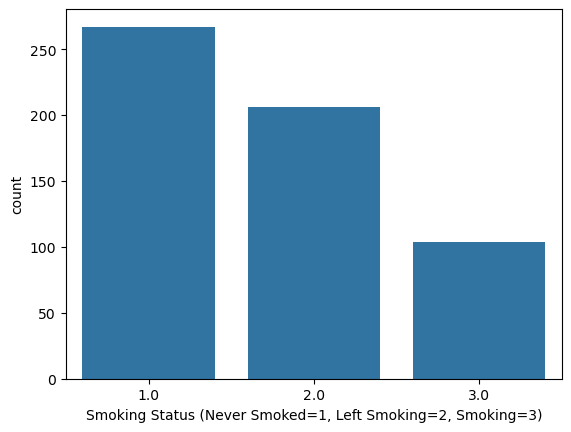

           Steatosis      Ratio
Steatosis                      
2                246  40.661157
3                208  34.380165
1                151  24.958678
##############################


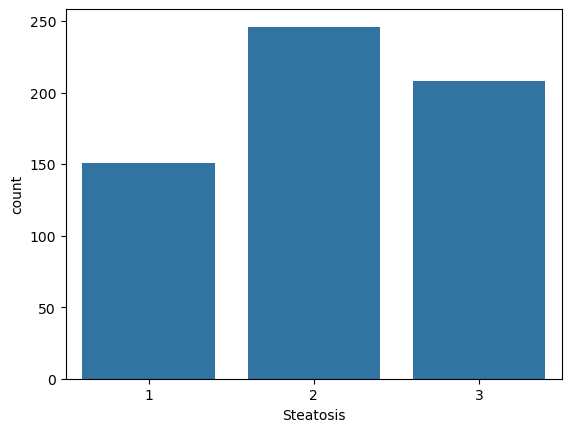

          Activity      Ratio
Activity                     
4              208  34.380165
3              195  32.231405
2              139  22.975207
1               50   8.264463
0               13   2.148760
##############################


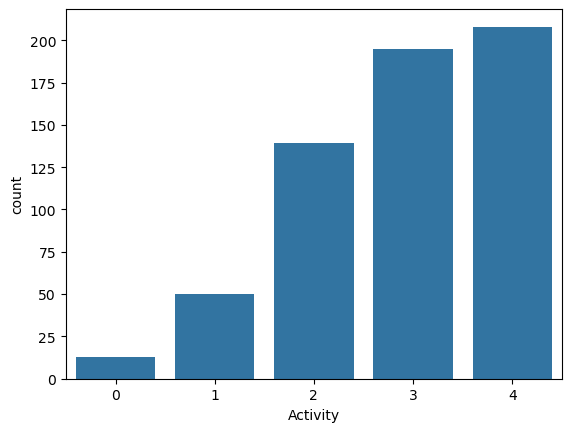

          Fibrosis      Ratio
Fibrosis                     
0              196  32.396694
1              190  31.404959
2              111  18.347107
3               84  13.884298
4               24   3.966942
##############################


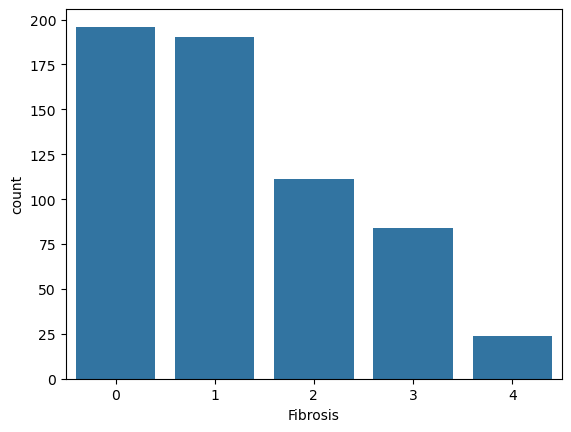

                                NAS score according to Kleiner      Ratio
NAS score according to Kleiner                                           
5                                                          139  22.975207
6                                                          133  21.983471
4                                                          104  17.190083
7                                                           89  14.710744
3                                                           74  12.231405
8                                                           33   5.454545
2                                                           24   3.966942
1                                                            9   1.487603
##############################


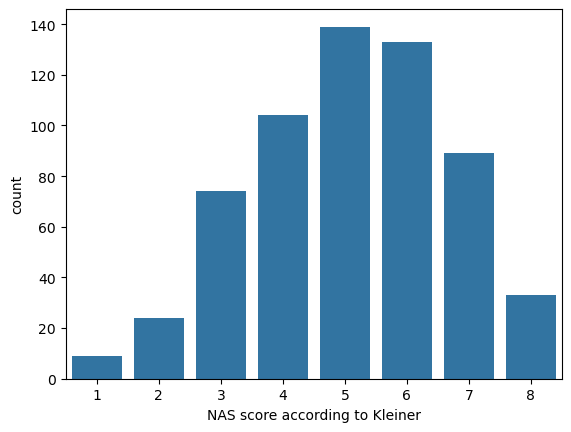

                                                    NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)  \
NAS score>=4 and Fibrosis>=2 (If NAS score>=4 a...                                                                                   
1                                                                                                 432                                
0                                                                                                 173                                

                                                        Ratio  
NAS score>=4 and Fibrosis>=2 (If NAS score>=4 a...             
1                                                   71.404959  
0                                                   28.595041  
##############################


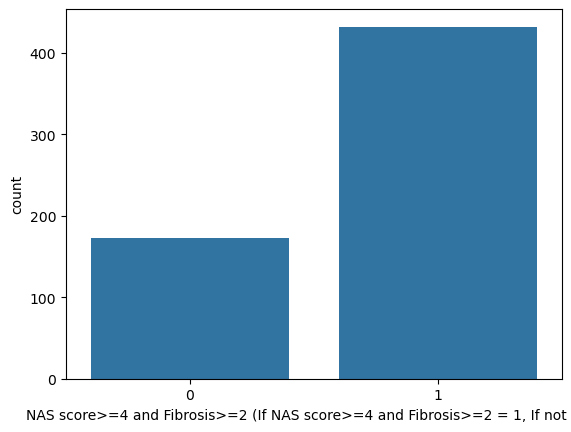

                                                    Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)  \
Fibrosis status (No=0, Yes=1) (Fibrosis 1 and a...                                                                            
1                                                                                                 409                         
0                                                                                                 196                         

                                                        Ratio  
Fibrosis status (No=0, Yes=1) (Fibrosis 1 and a...             
1                                                   67.603306  
0                                                   32.396694  
##############################


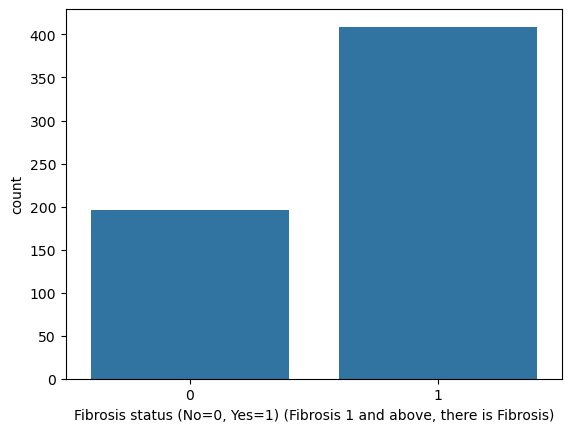

                                                    Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)  \
Significant Fibrosis (No=0, Yes=1) (If Fibrosis...                                                                                                
0                                                                                                 386                                             
1                                                                                                 219                                             

                                                        Ratio  
Significant Fibrosis (No=0, Yes=1) (If Fibrosis...             
0                                                   63.801653  
1                                                   36.198347  
##############################


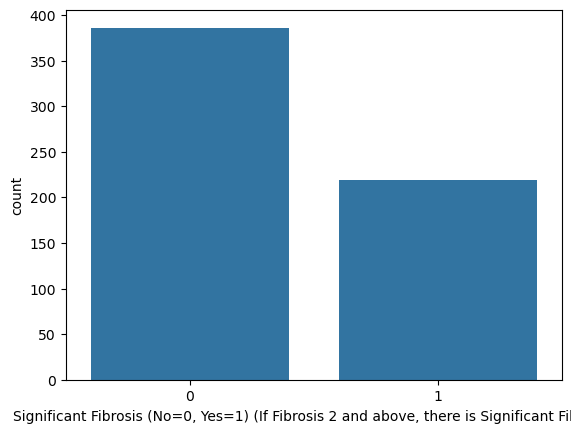

                                                    Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis)  \
Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is...                                                                                             
0                                                                                                 497                                          
1                                                                                                 108                                          

                                                       Ratio  
Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is...            
0                                                   82.14876  
1                                                   17.85124  
##############################


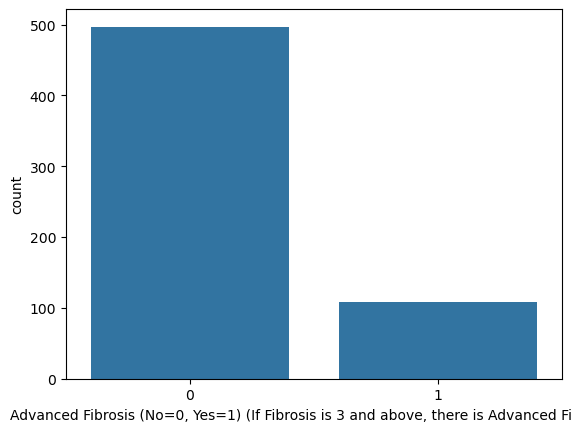

                                                    Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, there is Cirrhosis)  \
Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, ther...                                                                   
0                                                                                                 581                
1                                                                                                  24                

                                                        Ratio  
Cirrhosis (No=0, Yes=1) (If Fibrosis is 4, ther...             
0                                                   96.033058  
1                                                    3.966942  
##############################


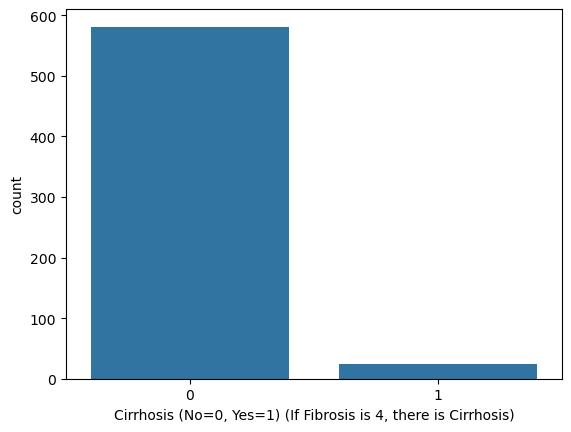

                                             Diagnosis according to SAF (NASH=1, NAFL=2)  \
Diagnosis according to SAF (NASH=1, NAFL=2)                                                
1                                                                                    537   
2                                                                                     68   

                                                 Ratio  
Diagnosis according to SAF (NASH=1, NAFL=2)             
1                                            88.760331  
2                                            11.239669  
##############################


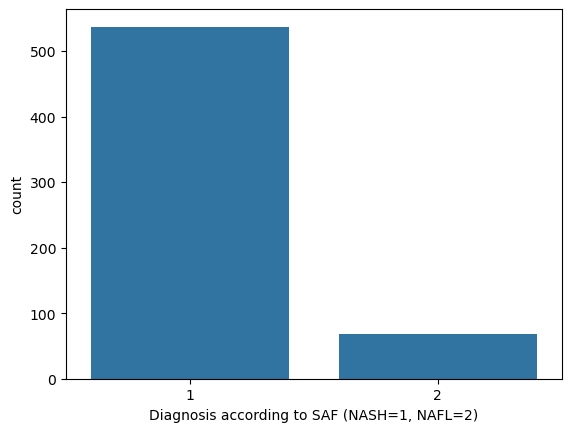

                                                    Type of Disease (Mild illness=1, Severe illness=2)  \
Type of Disease (Mild illness=1, Severe illness=2)                                                       
2                                                                                                 546    
1                                                                                                  59    

                                                        Ratio  
Type of Disease (Mild illness=1, Severe illness=2)             
2                                                   90.247934  
1                                                    9.752066  
##############################


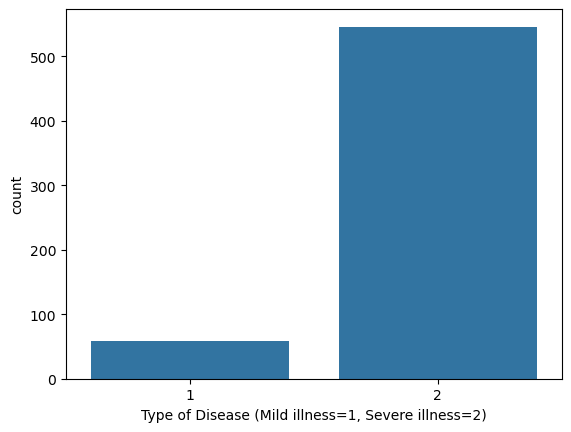

In [125]:
import matplotlib.pyplot as plt
def cat_summary(dataframe,col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                                                                  "Ratio":100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##############################")
    
    
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

for col in cat_cols:
    cat_summary(df, col, plot = True)

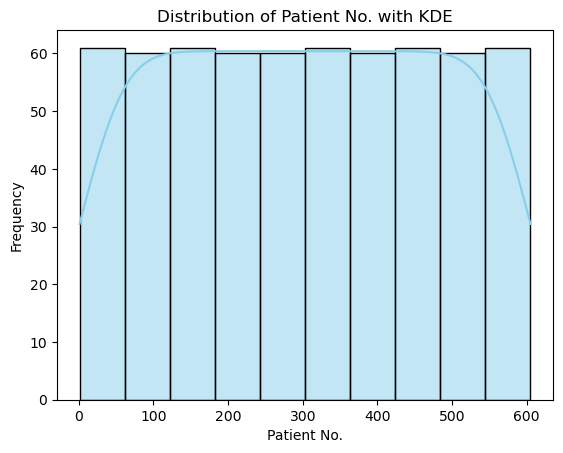

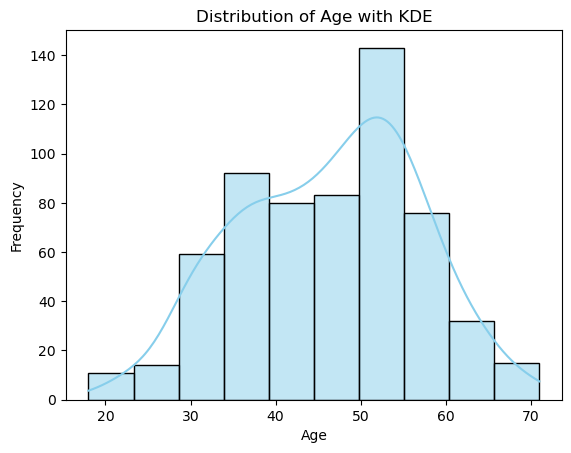

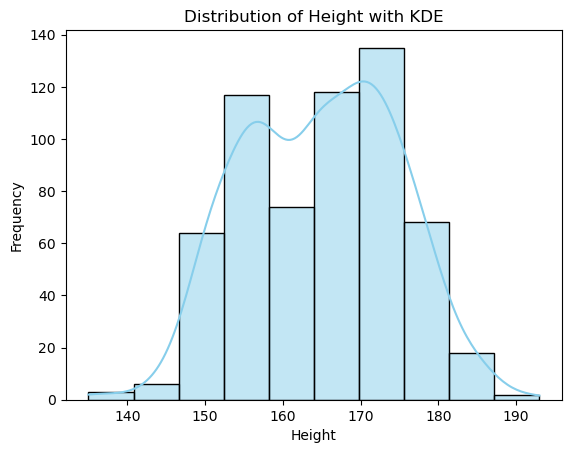

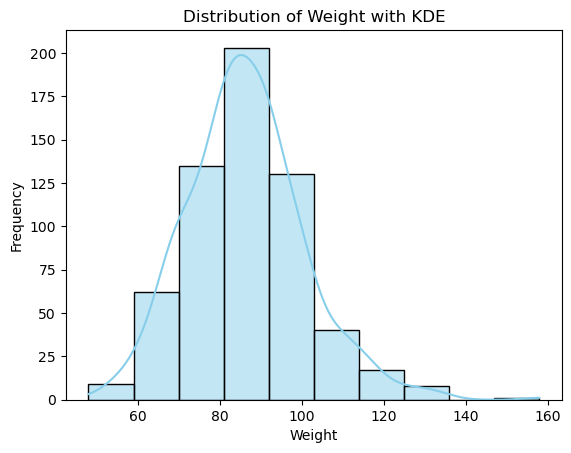

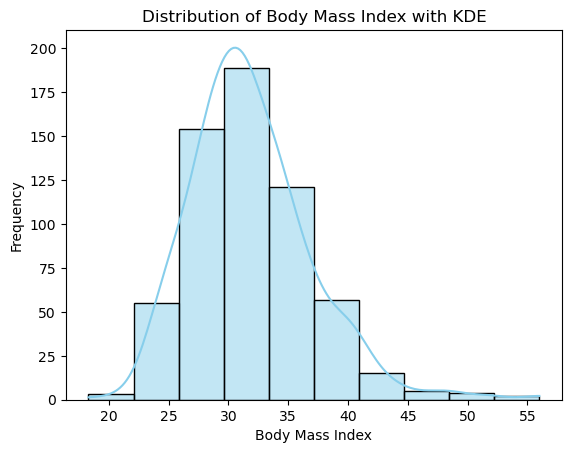

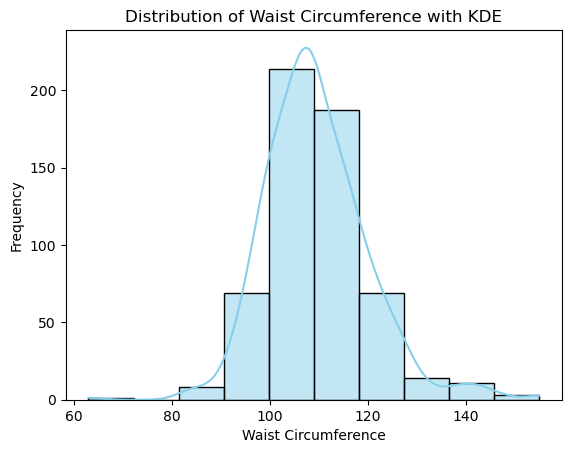

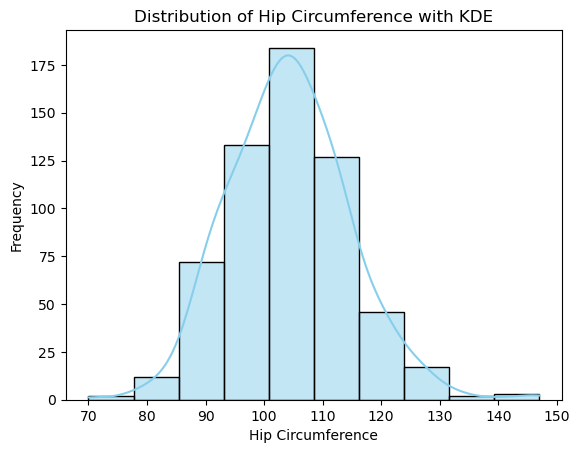

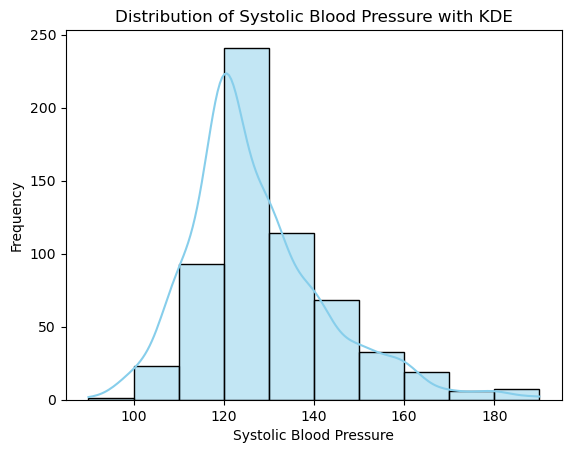

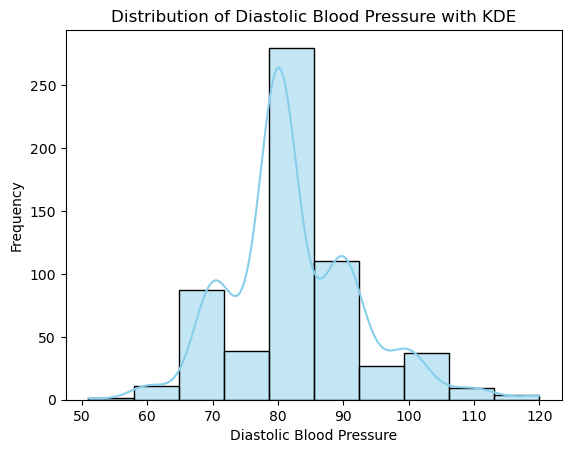

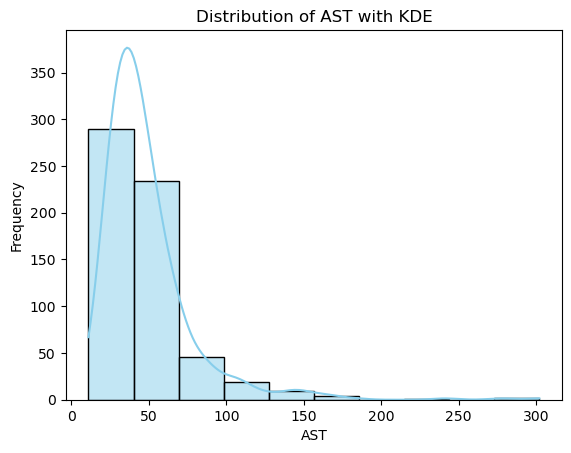

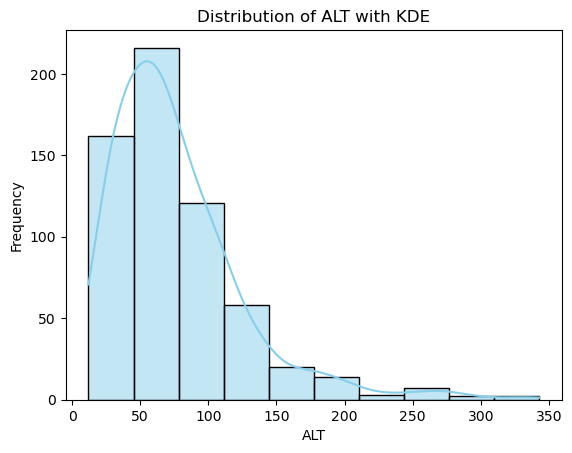

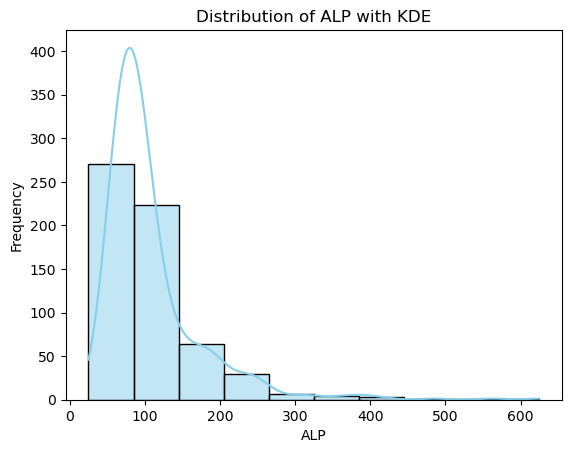

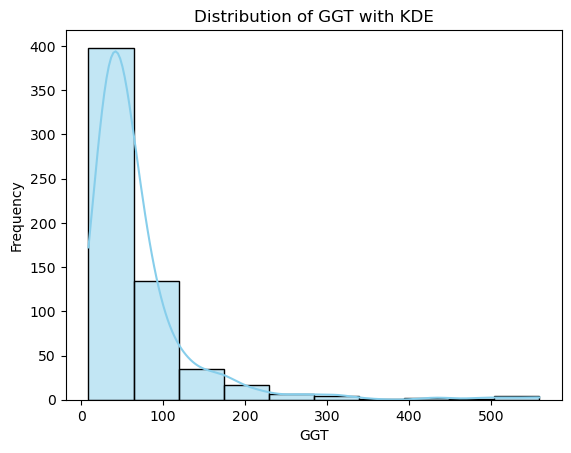

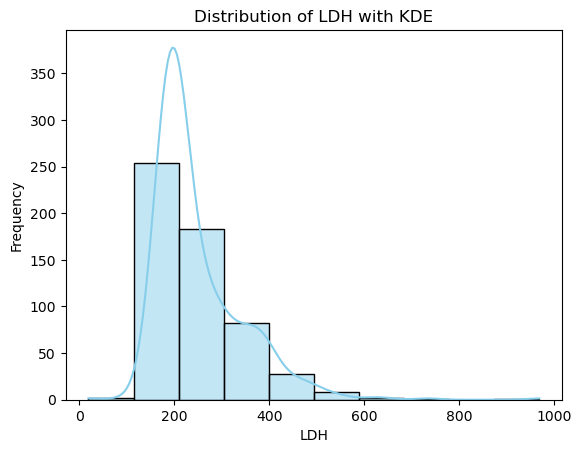

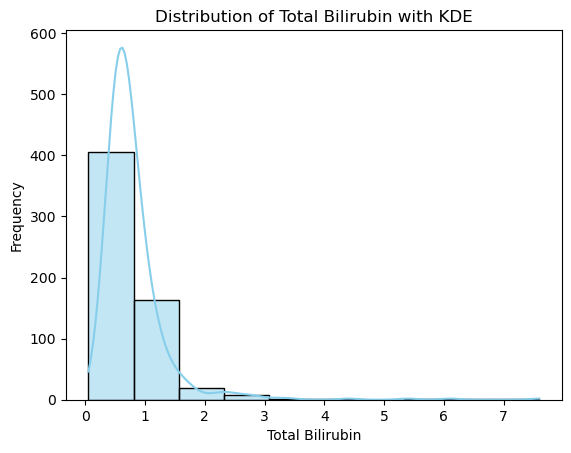

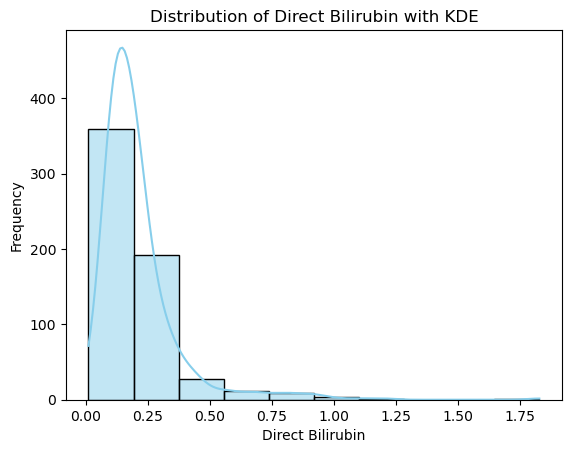

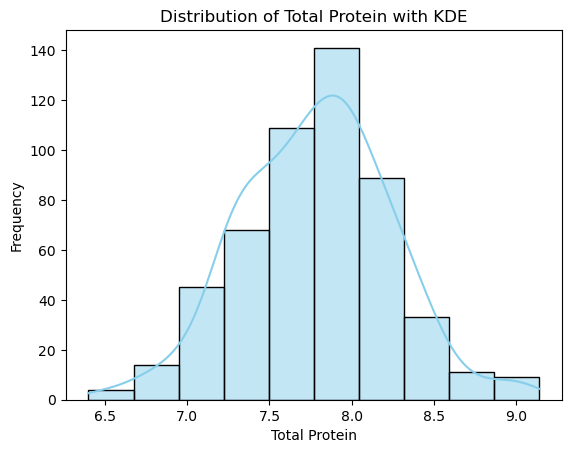

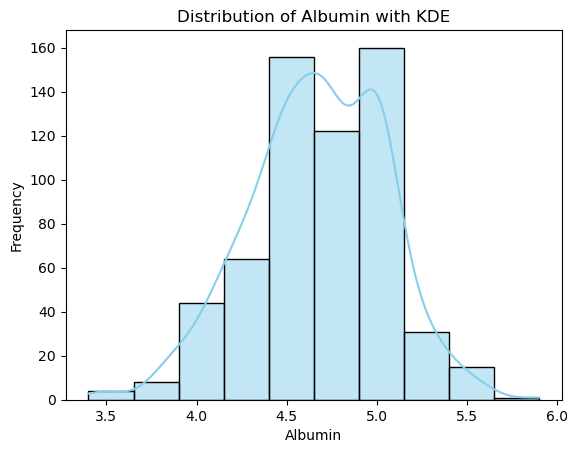

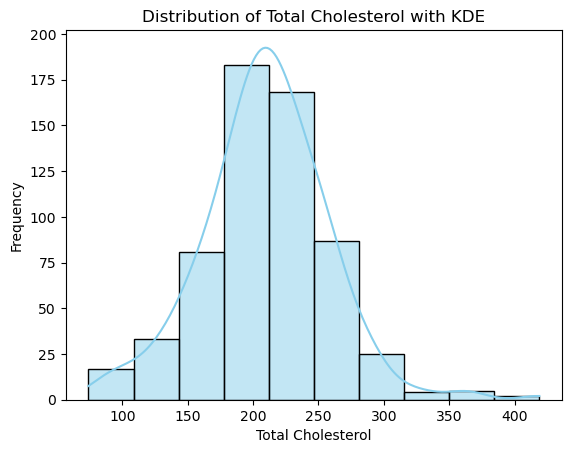

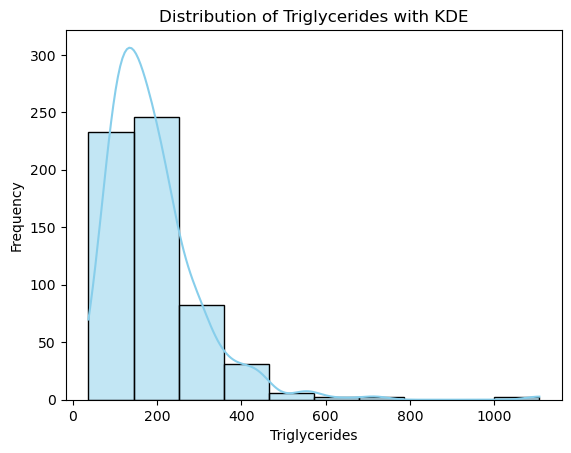

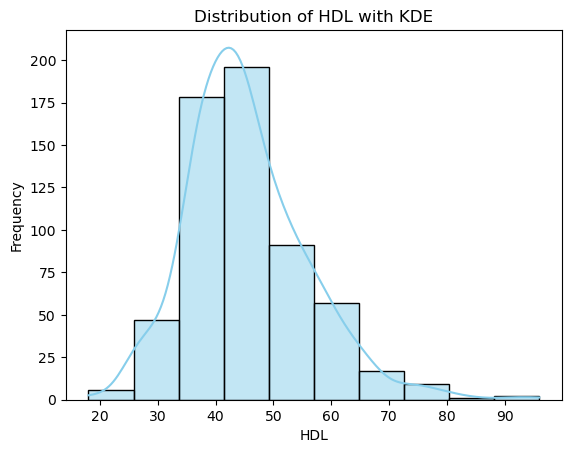

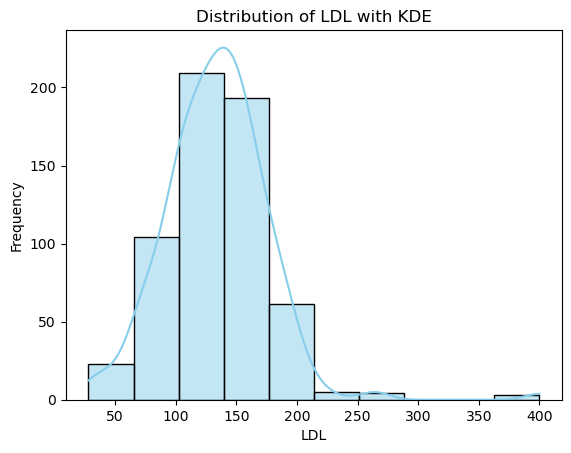

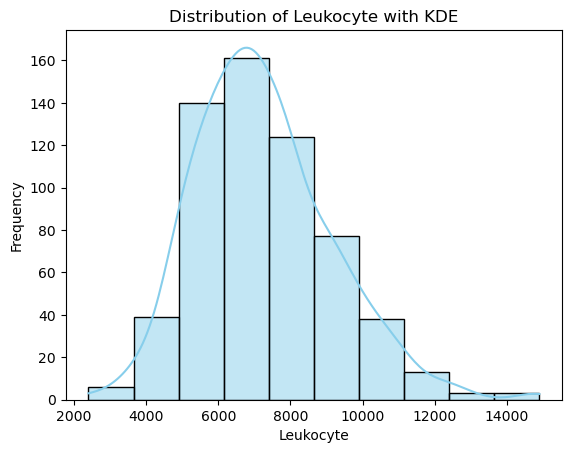

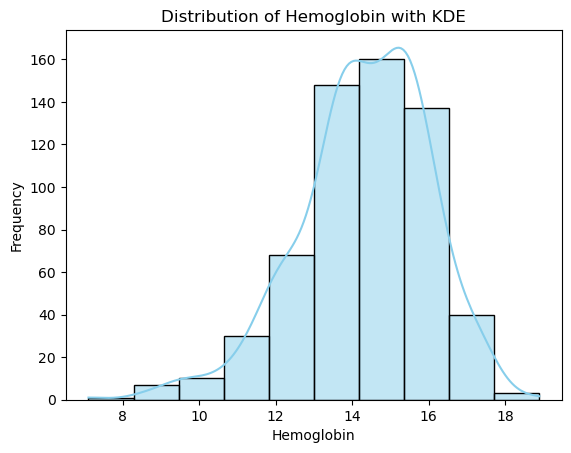

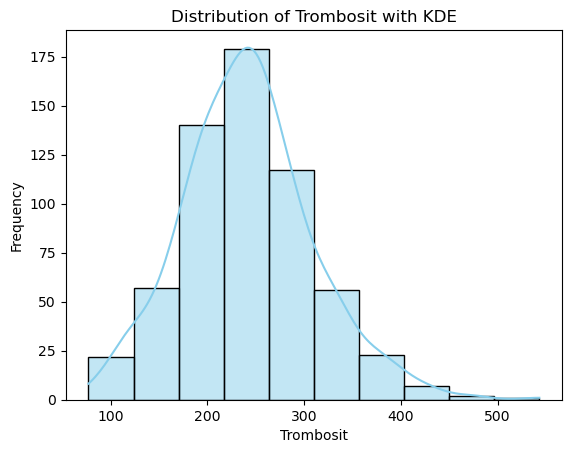

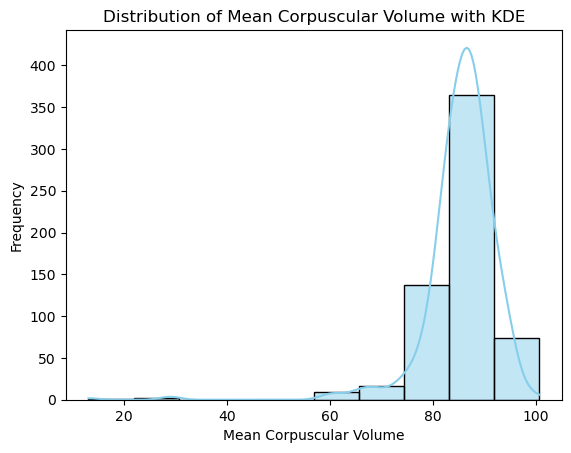

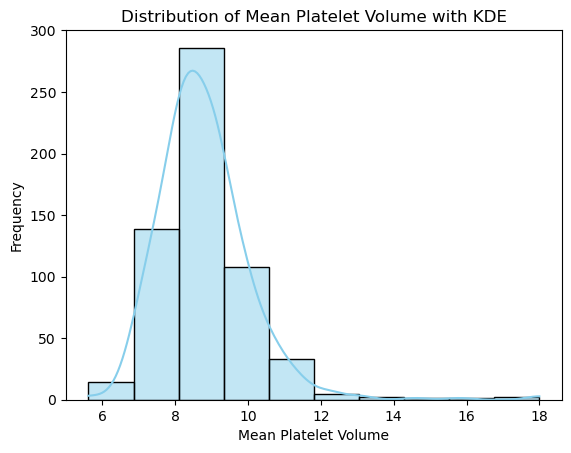

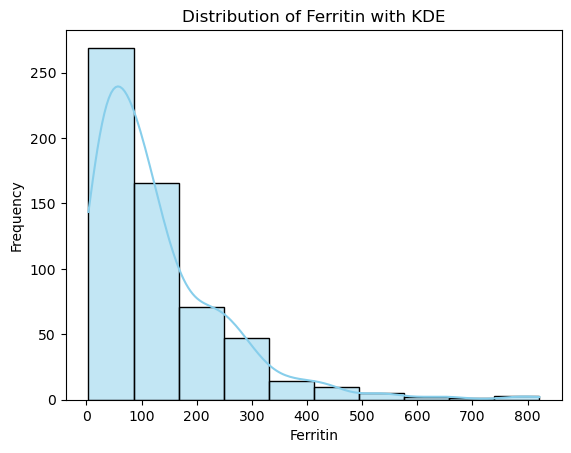

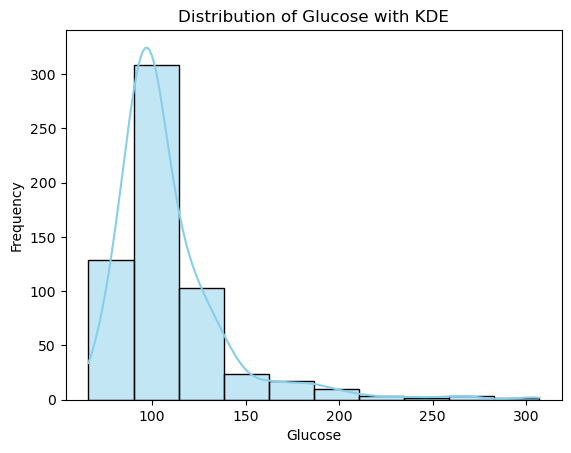

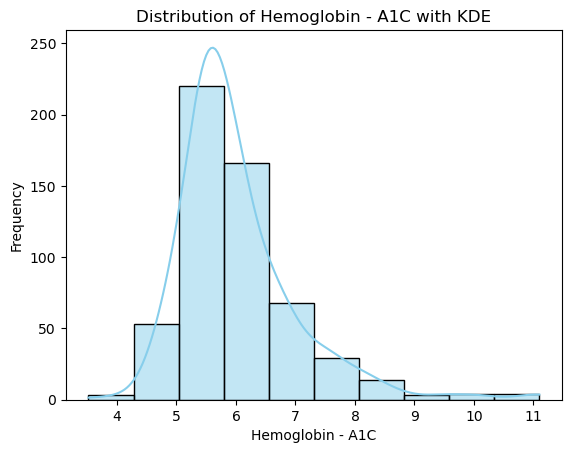

In [126]:
# Nümerik değişkenleri görselleştirme
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], bins=10, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col} with KDE')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [129]:
# Sonuçları tutmak için bir liste oluşturma
outlier_summary = []

# IQR yöntemiyle aykırı değer analizi
for col in num_cols:
    Q1 = df[col].quantile(0.25)  # 1. çeyrek
    Q3 = df[col].quantile(0.75)  # 3. çeyrek
    IQR = Q3 - Q1               # IQR değeri
    
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır
    
    # Aykırı değerleri tespit etme
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]  # Aykırı değer sayısı
    
    # Minimum ve maksimum değerleri alma
    min_value = df[col].min()
    max_value = df[col].max()
    
    # Sonuçları listeye ekleme
    outlier_summary.append({
        'Column': col,
        'Outlier Count': outlier_count,
        'Min Value': min_value,
        'Max Value': max_value,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

# Sonuçları bir DataFrame'e dönüştürme
outlier_summary_df = pd.DataFrame(outlier_summary)

# DataFrame'i gösterme
outlier_summary_df

,Column,Outlier Count,Min Value,Max Value,Lower Bound,Upper Bound
0,Patient No.,0,1.00,605.00,-301.00000,907.00000
1,Age,0,18.00,71.00,14.00000,78.00000
2,Height,0,135.00,193.00,134.50000,194.50000
3,Weight,15,48.00,158.00,54.00000,118.00000
4,Body Mass Index,16,18.29,56.00,19.74500,43.38500
5,Waist Circumference,16,63.00,155.00,82.50000,134.50000
6,Hip Circumference,11,70.00,147.00,80.00000,128.00000
7,Systolic Blood Pressure,36,90.00,190.00,97.50000,157.50000
8,Diastolic Blood Pressure,25,51.00,120.00,65.00000,105.00000
9,AST,38,11.00,302.00,-6.50000,93.50000


In [131]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)  # 1. çeyrek
    Q3 = df[col].quantile(0.75)  # 3. çeyrek
    IQR = Q3 - Q1               # IQR değeri
    
    lower_bound = Q1 - 1.5 * IQR  # Alt sınır
    upper_bound = Q3 + 1.5 * IQR  # Üst sınır
    
    # Alt sınırdan küçük değerleri alt sınıra eşitle
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else x)
    # Üst sınırdan büyük değerleri üst sınıra eşitle
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else x)

In [133]:
# Boşluk oranı 0'dan büyük olan sütunları seçme
missing_columns = df.columns[df.isnull().mean() > 0]

# Bu sütunların eşsiz değer sayılarını hesaplama
unique_counts = df[missing_columns].nunique()

# Sonuçları bir DataFrame olarak saklama
result = pd.DataFrame({
    'Unique Count': unique_counts
})

print(result)

                                                    Unique Count
Waist Circumference                                           50
Hip Circumference                                             49
Smoking Status (Never Smoked=1, Left Smoking=2,...             3
ALP                                                          126
GGT                                                          109
LDH                                                          205
Total Bilirubin                                              111
Direct Bilirubin                                              39
Total Protein                                                 59
Triglycerides                                                235
HDL                                                           49
LDL                                                          161
Leukocyte                                                    186
Hemoglobin                                                    76
Trombosit                

In [135]:
# Boşluk oranı 0'dan büyük olan sütunları seçme
missing_columns = df.columns[df.isnull().mean() > 0]

# Bu sütunlardaki boşlukları ortalama ile doldurma
for column in missing_columns:
    mean_value = df[column].mean()  # Sütunun ortalamasını hesapla
    df[column] = df[column].fillna(mean_value)  # Boşlukları ortalama ile doldur

print("Boşluklar sütun ortalamalarıyla dolduruldu.")


Boşluklar sütun ortalamalarıyla dolduruldu.


In [137]:
df.columns[df.isnull().mean() > 0]

Index([], dtype='object')

In [139]:
df.columns

Index(['Patient No.', 'Age', 'Gender (Female=1, Male=2)', 'Height', 'Weight',
       'Body Mass Index', 'Waist Circumference', 'Hip Circumference',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Diyabetes Mellitus (No=0, Yes=1)', 'Hypertension (No=0, Yes=1)',
       'Hyperlipidemia (No=0, Yes=1)', 'Metabolic syndrome (No=0, Yes=1)',
       'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)', 'AST',
       'ALT', 'ALP', 'GGT', 'LDH', 'Total Bilirubin', 'Direct Bilirubin',
       'Total Protein', 'Albumin', 'Total Cholesterol', 'Triglycerides', 'HDL',
       'LDL', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'Ferritin',
       'Glucose', 'Hemoglobin - A1C', 'Steatosis', 'Activity', 'Fibrosis',
       'NAS score according to Kleiner',
       'NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)',
       'Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)',
 

In [141]:
# Sınıf dağılımı
target_col = 'Diagnosis according to SAF (NASH=1, NAFL=2)'
class_distribution = df[target_col].value_counts()
print("Sınıf Dağılımı:")
print(class_distribution)

Sınıf Dağılımı:
Diagnosis according to SAF (NASH=1, NAFL=2)
1    537
2     68
Name: count, dtype: int64


In [143]:
df.shape

(605, 47)

In [147]:
# Korelasyon analizi
def find_high_correlations(df, target_variable, threshold=0.6):
    """
    Finds and prints pairs of features with correlation above a threshold.
    Also calculates correlations with the target variable.
    """
    correlation_matrix = df.corr()
    
    # Diğer değişkenler ile korelasyonları kontrol et
    print("Highly correlated features (correlation > {:.2f}):\n".format(threshold))
    high_corr_pairs = []
    for col in correlation_matrix.columns:
        for idx in correlation_matrix.index:
            if col != idx and abs(correlation_matrix.loc[col, idx]) > threshold:
                high_corr_pairs.append((col, idx, correlation_matrix.loc[col, idx]))
    
    # Benzersiz çiftleri yazdır
    seen = set()
    for col, idx, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        if (idx, col) not in seen:
            seen.add((col, idx))
            print(f"{col} and {idx}: {corr:.2f}")

    # Hedef değişken ile korelasyon
    print("\nCorrelation with the target variable '{}':\n".format(target_variable))
    target_corr = correlation_matrix[target_variable]
    for feature, corr in target_corr.drop(labels=[target_variable]).items():
        print(f"{feature}: {corr:.2f}")

target_variable = "Diagnosis according to SAF (NASH=1, NAFL=2)"
find_high_correlations(df, target_variable)



Highly correlated features (correlation > 0.60):

Diagnosis according to SAF (NASH=1, NAFL=2) and Type of Disease (Mild illness=1, Severe illness=2): -0.92
Fibrosis and Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis): 0.87
Activity and NAS score according to Kleiner: 0.87
AST and ALT: 0.85
Steatosis and NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0): 0.80
Total Cholesterol and LDL: 0.79
Fibrosis and Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, there is Advanced Fibrosis): 0.79
Patient No. and NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0): -0.78
Body Mass Index and Waist Circumference: 0.77
Body Mass Index and Hip Circumference: 0.76
Weight and Hip Circumference: 0.75
Gender (Female=1, Male=2) and Height: 0.75
Fibrosis and Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis): 0.75
Weight and Body Mass Index: 0.71
NAS score according to Kleiner a

In [153]:
# Silinecek değişkenler
columns_to_drop = [
    'Waist Circumference',
    'Hip Circumference',
    'Systolic Blood Pressure',
    'Diastolic Blood Pressure',
    'LDL',
    'Age',
    'ALP',
    'GGT',
    'Total Bilirubin',
    'Albumin',
    'Triglycerides'
]

# DataFrame'den silme
df_reduced = df.drop(columns=columns_to_drop)

# Sonuç
print("Kalan sütunlar:", df_reduced.columns)


Kalan sütunlar: Index(['Patient No.', 'Gender (Female=1, Male=2)', 'Height', 'Weight',
       'Body Mass Index', 'Diyabetes Mellitus (No=0, Yes=1)',
       'Hypertension (No=0, Yes=1)', 'Hyperlipidemia (No=0, Yes=1)',
       'Metabolic syndrome (No=0, Yes=1)',
       'Smoking Status (Never Smoked=1, Left Smoking=2, Smoking=3)', 'AST',
       'ALT', 'LDH', 'Direct Bilirubin', 'Total Protein', 'Total Cholesterol',
       'HDL', 'Leukocyte', 'Hemoglobin', 'Trombosit',
       'Mean Corpuscular Volume', 'Mean Platelet Volume', 'Ferritin',
       'Glucose', 'Hemoglobin - A1C', 'Steatosis', 'Activity', 'Fibrosis',
       'NAS score according to Kleiner',
       'NAS score>=4 and Fibrosis>=2 (If NAS score>=4 and Fibrosis>=2 = 1, If not = 0)',
       'Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)',
       'Significant Fibrosis (No=0, Yes=1) (If Fibrosis 2 and above, there is Significant Fibrosis)',
       'Advanced Fibrosis (No=0, Yes=1) (If Fibrosis is 3 and above, th

In [155]:
df = df.drop(['Patient No.'],axis=1)

In [157]:
df.shape

(605, 46)

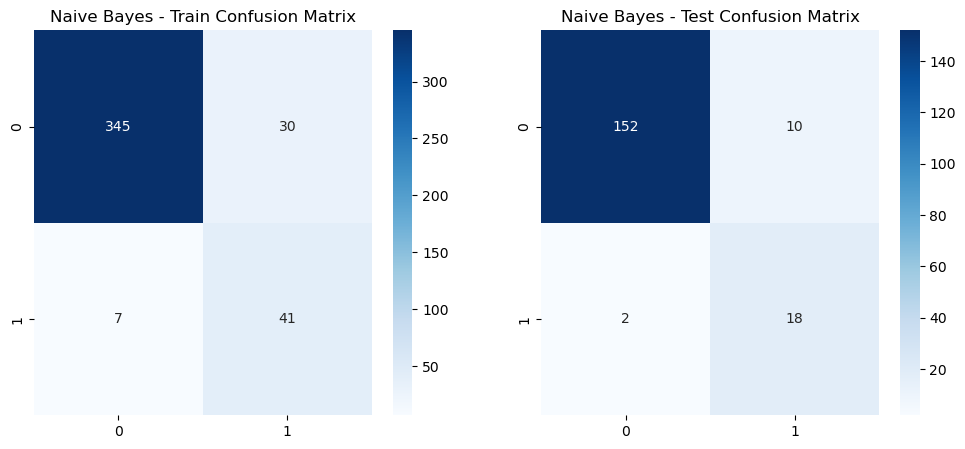

--- Naive Bayes Metrics ---
Accuracy: Train = 0.91, Test = 0.93
Precision: Train = 0.93, Test = 0.95
Recall: Train = 0.91, Test = 0.93
F1 Score: Train = 0.92, Test = 0.94
Cohen Kappa: Train = 0.64, Test = 0.71
MCC: Train = 0.66, Test = 0.73




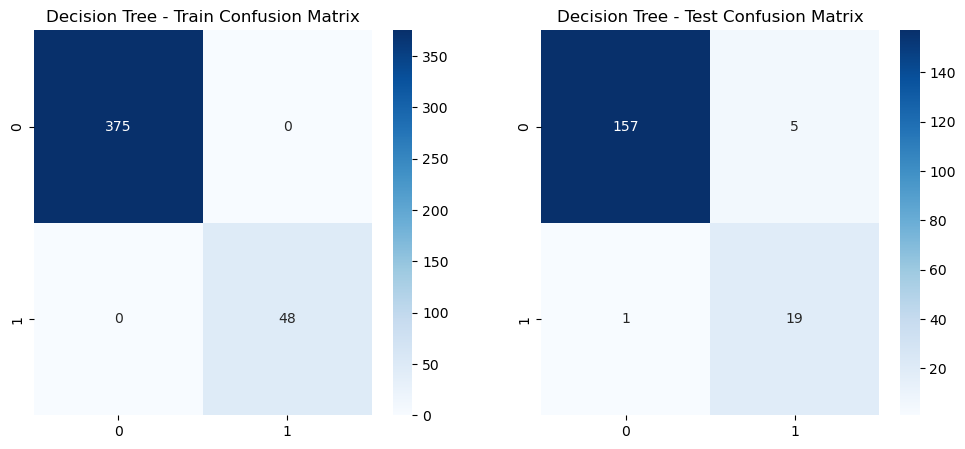

--- Decision Tree Metrics ---
Accuracy: Train = 1.00, Test = 0.97
Precision: Train = 1.00, Test = 0.97
Recall: Train = 1.00, Test = 0.97
F1 Score: Train = 1.00, Test = 0.97
Cohen Kappa: Train = 1.00, Test = 0.85
MCC: Train = 1.00, Test = 0.85




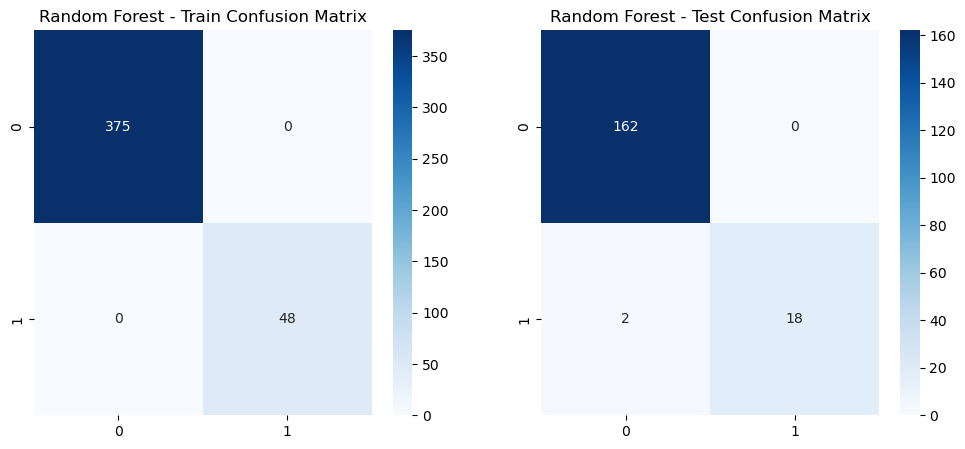

--- Random Forest Metrics ---
Accuracy: Train = 1.00, Test = 0.99
Precision: Train = 1.00, Test = 0.99
Recall: Train = 1.00, Test = 0.99
F1 Score: Train = 1.00, Test = 0.99
Cohen Kappa: Train = 1.00, Test = 0.94
MCC: Train = 1.00, Test = 0.94




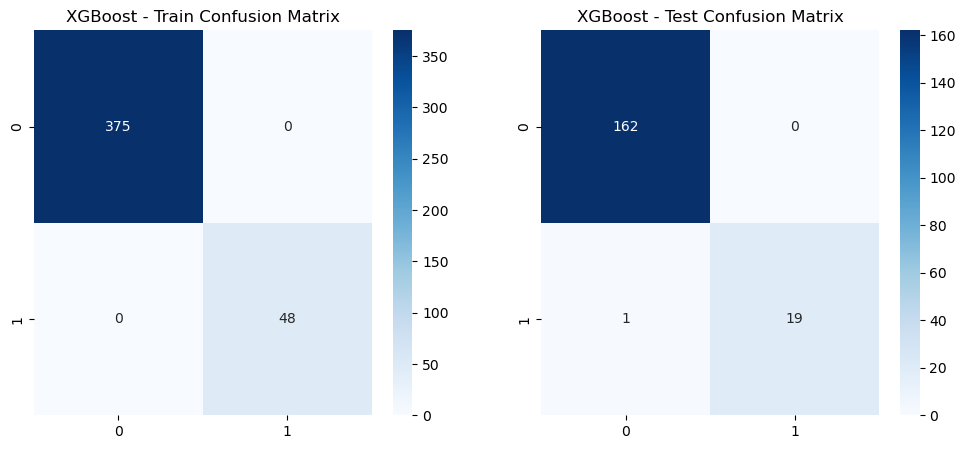

--- XGBoost Metrics ---
Accuracy: Train = 1.00, Test = 0.99
Precision: Train = 1.00, Test = 0.99
Recall: Train = 1.00, Test = 0.99
F1 Score: Train = 1.00, Test = 0.99
Cohen Kappa: Train = 1.00, Test = 0.97
MCC: Train = 1.00, Test = 0.97




In [161]:
# Hedef değişkenin adı
target_variable = "Diagnosis according to SAF (NASH=1, NAFL=2)"

# Bağımsız ve bağımlı değişkenlerin ayrılması
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Hedef değişkeni yeniden etiketleme (XGBoost ile uyumlu hale getirmek için)
y = y.replace({1: 0, 2: 1})

# Train ve test setine ayırma (%70 train, %30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Class weights hesaplama
class_weight = {
    0: len(y_train) / (2 * len(y_train[y_train == 0])),
    1: len(y_train) / (2 * len(y_train[y_train == 1]))
}

# --- Değerlendirme Fonksiyonu ---
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Modeli eğit
    model.fit(X_train, y_train)
    
    # Tahminler
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrikler
    metrics = {
        "Accuracy": (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
        "Precision": (precision_score(y_train, y_train_pred, average='weighted'), precision_score(y_test, y_test_pred, average='weighted')),
        "Recall": (recall_score(y_train, y_train_pred, average='weighted'), recall_score(y_test, y_test_pred, average='weighted')),
        "F1 Score": (f1_score(y_train, y_train_pred, average='weighted'), f1_score(y_test, y_test_pred, average='weighted')),
        "Cohen Kappa": (cohen_kappa_score(y_train, y_train_pred), cohen_kappa_score(y_test, y_test_pred)),
        "MCC": (matthews_corrcoef(y_train, y_train_pred), matthews_corrcoef(y_test, y_test_pred))
    }
    
    # Confusion Matrix
    train_cm = confusion_matrix(y_train, y_train_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    
    # Confusion Matrix Görselleştirme
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title(f"{model_name} - Train Confusion Matrix")
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', ax=ax[1])
    ax[1].set_title(f"{model_name} - Test Confusion Matrix")
    plt.show()
    
    # Metrikleri Yazdır
    print(f"--- {model_name} Metrics ---")
    for metric, values in metrics.items():
        print(f"{metric}: Train = {values[0]:.2f}, Test = {values[1]:.2f}")
    print("\n")

# --- Modellerin Tanımlanması ---
models = {
    "Naive Bayes": GaussianNB(),  # Class weight manuel olarak ayarlanabilir
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
        random_state=42
    )
}

# --- Modelleri Eğit ve Değerlendir ---
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)